# RedBack Racing 🚗 🏁 - LASSO and Ridge 

By Faiyam Islam, Klaus Leung, Lynette Zhang

* Splitting data to training and test set, standardising the input parameters (predictors) 
* Applying LASSO which is used as a variable selection method to choose the appropriate predictors in determining th

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn import linear_model
from sklearn.linear_model import Lasso 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV

### LASSO

In [2]:
df_recent = pd.read_csv('~/Downloads/Datasets/final_df.csv')
remove_cols = ['Unnamed: 0']
df_recent = df_recent.drop(remove_cols, axis=1)

In [3]:
input_params = df_recent.iloc[:, -33:]

In [4]:
input_params

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_STATIC_CAMBER,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC
0,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,-1.70860,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812
1,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,-1.70860,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812
2,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,-1.70860,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812
3,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,-1.70860,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812
4,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,-1.70860,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,698.93018,0.76863,0.36602,0.21200,2.38380,1.61676,0.42474,7207.19228,40821.02577,1.01292,...,-2.13237,22653.89059,67859.44708,0.08808,1499.05128,855.39614,3698.60581,3208.28739,11.18156,11.01071
752,698.93018,0.76863,0.36602,0.21200,2.38380,1.61676,0.42474,7207.19228,40821.02577,1.01292,...,-2.13237,22653.89059,67859.44708,0.08808,1499.05128,855.39614,3698.60581,3208.28739,11.18156,11.01071
753,698.93018,0.76863,0.36602,0.21200,2.38380,1.61676,0.42474,7207.19228,40821.02577,1.01292,...,-2.13237,22653.89059,67859.44708,0.08808,1499.05128,855.39614,3698.60581,3208.28739,11.18156,11.01071
754,698.93018,0.76863,0.36602,0.21200,2.38380,1.61676,0.42474,7207.19228,40821.02577,1.01292,...,-2.13237,22653.89059,67859.44708,0.08808,1499.05128,855.39614,3698.60581,3208.28739,11.18156,11.01071


In [5]:
Speed = df_recent.iloc[:, df_recent.columns == "SpeedKMH_max"]

In [6]:
train = df_recent.sample(frac=0.7, random_state = 1)
test = df_recent[df_recent.index.isin(train.index) == False].copy()

In [7]:
input_params["SpeedKMH_max"] = Speed

In [8]:
input_params

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max
0,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812,84.609711
1,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812,90.476089
2,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812,90.427589
3,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812,90.181877
4,584.97838,0.68159,0.04899,0.25441,11.56795,1.64804,0.42788,107461.69122,116229.74284,1.22661,...,56670.77262,104990.04453,0.10876,1198.99360,503.80323,2101.67425,1153.26332,15.86391,11.37812,89.712265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,698.93018,0.76863,0.36602,0.21200,2.38380,1.61676,0.42474,7207.19228,40821.02577,1.01292,...,22653.89059,67859.44708,0.08808,1499.05128,855.39614,3698.60581,3208.28739,11.18156,11.01071,89.712265
752,698.93018,0.76863,0.36602,0.21200,2.38380,1.61676,0.42474,7207.19228,40821.02577,1.01292,...,22653.89059,67859.44708,0.08808,1499.05128,855.39614,3698.60581,3208.28739,11.18156,11.01071,90.173370
753,698.93018,0.76863,0.36602,0.21200,2.38380,1.61676,0.42474,7207.19228,40821.02577,1.01292,...,22653.89059,67859.44708,0.08808,1499.05128,855.39614,3698.60581,3208.28739,11.18156,11.01071,90.272179
754,698.93018,0.76863,0.36602,0.21200,2.38380,1.61676,0.42474,7207.19228,40821.02577,1.01292,...,22653.89059,67859.44708,0.08808,1499.05128,855.39614,3698.60581,3208.28739,11.18156,11.01071,90.167564


In [9]:
response = ['LapTime_max']
predictors = input_params.columns
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature

In [10]:
mu.head()

brakes_DATA_MAX_TORQUE             609.966509
brakes_DATA_FRONT_SHARE              0.677081
drivetrain_DIFFERENTIAL_POWER        0.386982
drivetrain_DIFFERENTIAL_COAST        0.531807
drivetrain_DIFFERENTIAL_PRELOAD     11.185362
dtype: float64

In [11]:
sigma.head()

brakes_DATA_MAX_TORQUE             116.363411
brakes_DATA_FRONT_SHARE              0.094429
drivetrain_DIFFERENTIAL_POWER        0.255634
drivetrain_DIFFERENTIAL_COAST        0.302656
drivetrain_DIFFERENTIAL_PRELOAD      6.952373
dtype: float64

Need to standardise the predictors prior to analysis.

In [12]:
train[predictors] = (train[predictors] - mu)/sigma
test[predictors] = (test[predictors] - mu)/sigma

In [13]:
mu = train[predictors].mean() # mean for each feature
sigma = train[predictors].std() # std for each feature

In [14]:
mu.head()

brakes_DATA_MAX_TORQUE            -2.948991e-15
brakes_DATA_FRONT_SHARE           -7.181716e-15
drivetrain_DIFFERENTIAL_POWER     -1.427130e-17
drivetrain_DIFFERENTIAL_COAST     -5.641360e-16
drivetrain_DIFFERENTIAL_PRELOAD   -5.668643e-16
dtype: float64

In [15]:
sigma.head()

brakes_DATA_MAX_TORQUE             1.0
brakes_DATA_FRONT_SHARE            1.0
drivetrain_DIFFERENTIAL_POWER      1.0
drivetrain_DIFFERENTIAL_COAST      1.0
drivetrain_DIFFERENTIAL_PRELOAD    1.0
dtype: float64

In [16]:
y_train = train.iloc[:, train.columns == "LapTime_max"]
X_train = train[predictors]
y_test = test.iloc[:, test.columns == "LapTime_max"]
X_test = test[predictors]

In [17]:
train = y_train.join(X_train)
test = y_test.join(X_test)

In [18]:
test

,LapTime_max,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,...,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max
7,40386,-0.214742,0.047747,-1.322171,-0.916543,0.055030,-0.471439,-0.489653,1.110417,0.786541,...,0.857198,-0.395410,1.031456,-1.479265,-1.387128,-0.851737,-1.160197,0.644180,-0.537702,0.341629
10,40302,-0.908705,-0.200376,-1.015835,-1.562127,0.974794,0.808693,1.854440,2.043121,-1.374356,...,-0.387287,-0.800405,-0.260467,0.498197,1.469971,-1.271465,0.641978,1.353853,-0.257190,0.516025
15,40401,-0.908705,-0.200376,-1.015835,-1.562127,0.974794,0.808693,1.854440,2.043121,-1.374356,...,-0.387287,-0.800405,-0.260467,0.498197,1.469971,-1.271465,0.641978,1.353853,-0.257190,0.400763
20,40461,-0.435826,1.295241,-0.630674,0.123614,0.820248,0.134361,0.703035,-1.347899,0.144320,...,1.207330,-1.090668,-0.947124,0.671028,1.100317,-0.072202,0.261990,0.964612,0.291625,0.488610
21,40722,-0.435826,1.295241,-0.630674,0.123614,0.820248,0.134361,0.703035,-1.347899,0.144320,...,1.207330,-1.090668,-0.947124,0.671028,1.100317,-0.072202,0.261990,0.964612,0.291625,0.349720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,40401,0.108557,0.693733,-0.804947,-0.477431,0.012559,0.411210,-0.065480,-0.116952,1.397886,...,1.429055,0.303041,-0.730633,-0.362160,-1.272084,-1.158756,0.118214,-1.368859,1.438312,0.400763
737,40494,0.108557,0.693733,-0.804947,-0.477431,0.012559,0.411210,-0.065480,-0.116952,1.397886,...,1.429055,0.303041,-0.730633,-0.362160,-1.272084,-1.158756,0.118214,-1.368859,1.438312,0.309630
740,40461,-0.737744,-0.476455,1.174331,1.539213,0.974986,1.124392,-0.773438,1.446166,-1.416479,...,1.364552,1.360276,-1.275579,1.407799,0.663833,0.023122,1.314065,-1.061391,0.044078,0.488610
747,59979,0.764533,0.969495,-0.081998,-1.056669,-1.265980,-0.755368,-0.532576,-1.427992,-1.306553,...,-1.639995,-1.157529,0.177060,-1.158277,-1.048325,0.879521,1.248135,-0.537796,-0.626173,-2.799974


In [19]:
train

,LapTime_max,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,...,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max
457,40386,0.484656,0.911462,0.777708,-0.345829,-0.151134,-1.157208,0.014625,0.341680,0.896346,...,0.760990,-1.101501,-0.115038,0.877801,-1.291604,0.697069,0.200132,-1.765117,0.871896,0.341629
537,40401,-1.274413,1.015032,-0.778229,-1.315676,-0.444106,-0.898785,1.251193,-0.214736,-1.440476,...,1.412839,-0.158420,0.329926,-1.602946,-0.303056,-1.415664,1.112296,-1.309239,-1.167425,0.400763
636,40401,-1.528815,0.331345,-0.251851,1.240260,1.425220,0.103318,-1.016213,-0.709641,-0.472193,...,-1.182226,-0.045950,-0.631890,-0.860418,-0.248012,-0.749545,0.948082,-0.720431,-1.103381,0.400763
386,40494,0.470574,0.424431,2.209053,1.322234,1.400066,0.395235,-1.034120,0.196452,-0.680032,...,0.082093,0.253499,-0.194776,1.030752,-0.198572,1.741897,0.101777,-1.324905,0.718271,0.309630
412,40386,-1.017124,-1.060702,0.523595,1.519686,0.186621,-0.883808,0.820048,1.769823,1.380164,...,-0.868013,0.652033,-1.138826,1.429052,1.267541,-1.450941,-0.572607,1.606543,-1.118570,0.341629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,40563,1.057260,-0.908948,-0.266559,-1.468192,0.615280,0.628423,-0.742544,2.180617,0.508759,...,-0.429884,-0.516413,1.243403,-1.105716,-0.774162,-0.753666,-0.712483,-0.824355,-0.499115,0.084269
182,40461,1.572544,0.453659,0.362505,1.277530,-1.364601,1.376097,1.392948,-0.670123,-0.735793,...,-0.887319,1.141994,0.747208,-0.344188,0.656470,-0.679767,1.559328,-0.941862,1.464773,0.488610
300,40722,0.771643,1.564755,-0.298637,-0.777606,1.273260,-1.296268,1.451592,-0.972616,-0.259423,...,-0.659147,-1.483673,-1.171879,-0.667604,0.370816,-0.150975,1.016176,-0.130742,0.440846,0.349720
576,59979,0.607810,1.174728,-0.754680,-0.901708,-1.417404,0.119565,-1.521721,-1.386225,1.705887,...,-0.793990,1.543034,0.517083,-0.243502,-1.364694,0.072431,-0.036775,0.472147,0.671540,-2.799974


In [20]:
lasso_optimal = LassoCV(cv = 5)
lasso_optimal.fit(X_train, np.ravel(y_train)) # the np.ravel is a necessary detail for compatibility 
print("LASSO Lambda: {0}".format(lasso_optimal.alpha_))

LASSO Lambda: 46.084133524300846


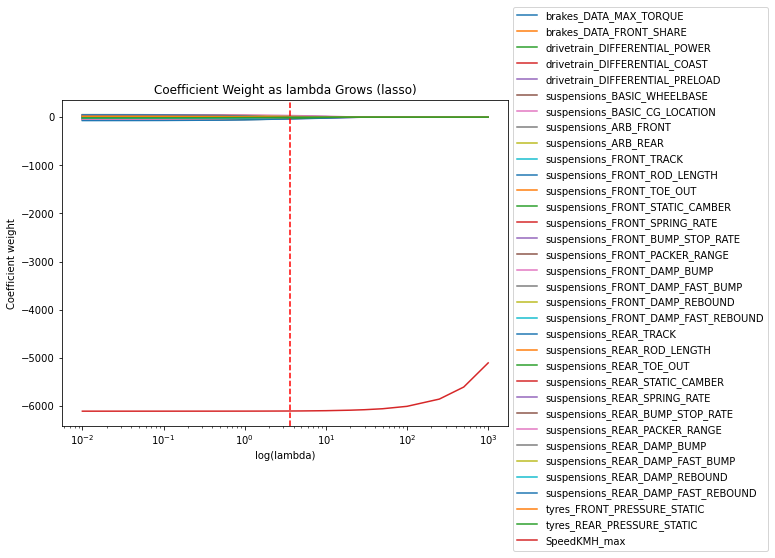

In [21]:
col_list = X_train.columns

y_train_arr = np.array(y_train)
X_train_arr = np.array(X_train)

lambdas = [0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1, 1.5, 2.5, 3, 3.66, 5, 10, 20, 30, 50, 100, 250, 500, 1000]
lasso_coefs = []
for l in lambdas:
    lasso = Lasso(alpha = l, fit_intercept = True)
    lasso.fit(X_train_arr, y_train_arr)
    lasso_coefs.append(lasso.coef_)

# make sure that the coefs(weights) is an array
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize = (8, 6))
for col in range(lasso_coefs.shape[1]):
    plt.plot(lambdas, lasso_coefs[:,col], label = col_list[col])

# scale x axis to log of lambda 
plt.xscale('log') 

# legend, title, axes labels 
plt.legend(bbox_to_anchor = (1, 1.3))
plt.title('Coefficient Weight as lambda Grows (lasso)')
plt.ylabel('Coefficient weight')
plt.xlabel('log(lambda)')
plt.axvline(3.6653263589356353, color = "red", linestyle = '--')
plt.show()

In [22]:
pd.DataFrame(lasso_optimal.coef_.round(3), index = X_train.columns)

,0
brakes_DATA_MAX_TORQUE,0.000
brakes_DATA_FRONT_SHARE,-0.000
drivetrain_DIFFERENTIAL_POWER,-0.000
drivetrain_DIFFERENTIAL_COAST,0.000
drivetrain_DIFFERENTIAL_PRELOAD,-0.000
suspensions_BASIC_WHEELBASE,-0.000
suspensions_BASIC_CG_LOCATION,-0.000
suspensions_ARB_FRONT,-0.000
suspensions_ARB_REAR,0.000
suspensions_FRONT_TRACK,0.000


### Ridge Regression 

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(10, shuffle = True, random_state = 1) 

score_lasso = cross_val_score(lasso_optimal, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')

In [24]:
print("RMSE of LASSO Regression =", np.sqrt(-1*np.mean(score_lasso)))

RMSE of LASSO Regression = 638.7594643438667


In [25]:
X_test

,brakes_DATA_MAX_TORQUE,brakes_DATA_FRONT_SHARE,drivetrain_DIFFERENTIAL_POWER,drivetrain_DIFFERENTIAL_COAST,drivetrain_DIFFERENTIAL_PRELOAD,suspensions_BASIC_WHEELBASE,suspensions_BASIC_CG_LOCATION,suspensions_ARB_FRONT,suspensions_ARB_REAR,suspensions_FRONT_TRACK,...,suspensions_REAR_SPRING_RATE,suspensions_REAR_BUMP_STOP_RATE,suspensions_REAR_PACKER_RANGE,suspensions_REAR_DAMP_BUMP,suspensions_REAR_DAMP_FAST_BUMP,suspensions_REAR_DAMP_REBOUND,suspensions_REAR_DAMP_FAST_REBOUND,tyres_FRONT_PRESSURE_STATIC,tyres_REAR_PRESSURE_STATIC,SpeedKMH_max
7,-0.214742,0.047747,-1.322171,-0.916543,0.055030,-0.471439,-0.489653,1.110417,0.786541,0.087412,...,0.857198,-0.395410,1.031456,-1.479265,-1.387128,-0.851737,-1.160197,0.644180,-0.537702,0.341629
10,-0.908705,-0.200376,-1.015835,-1.562127,0.974794,0.808693,1.854440,2.043121,-1.374356,-1.556750,...,-0.387287,-0.800405,-0.260467,0.498197,1.469971,-1.271465,0.641978,1.353853,-0.257190,0.516025
15,-0.908705,-0.200376,-1.015835,-1.562127,0.974794,0.808693,1.854440,2.043121,-1.374356,-1.556750,...,-0.387287,-0.800405,-0.260467,0.498197,1.469971,-1.271465,0.641978,1.353853,-0.257190,0.400763
20,-0.435826,1.295241,-0.630674,0.123614,0.820248,0.134361,0.703035,-1.347899,0.144320,0.962285,...,1.207330,-1.090668,-0.947124,0.671028,1.100317,-0.072202,0.261990,0.964612,0.291625,0.488610
21,-0.435826,1.295241,-0.630674,0.123614,0.820248,0.134361,0.703035,-1.347899,0.144320,0.962285,...,1.207330,-1.090668,-0.947124,0.671028,1.100317,-0.072202,0.261990,0.964612,0.291625,0.349720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.108557,0.693733,-0.804947,-0.477431,0.012559,0.411210,-0.065480,-0.116952,1.397886,1.122656,...,1.429055,0.303041,-0.730633,-0.362160,-1.272084,-1.158756,0.118214,-1.368859,1.438312,0.400763
737,0.108557,0.693733,-0.804947,-0.477431,0.012559,0.411210,-0.065480,-0.116952,1.397886,1.122656,...,1.429055,0.303041,-0.730633,-0.362160,-1.272084,-1.158756,0.118214,-1.368859,1.438312,0.309630
740,-0.737744,-0.476455,1.174331,1.539213,0.974986,1.124392,-0.773438,1.446166,-1.416479,0.867046,...,1.364552,1.360276,-1.275579,1.407799,0.663833,0.023122,1.314065,-1.061391,0.044078,0.488610
747,0.764533,0.969495,-0.081998,-1.056669,-1.265980,-0.755368,-0.532576,-1.427992,-1.306553,-1.724838,...,-1.639995,-1.157529,0.177060,-1.158277,-1.048325,0.879521,1.248135,-0.537796,-0.626173,-2.799974


In [26]:
X_train = X_train.iloc[:,lasso_optimal.coef_ != 0]
X_test = X_test.iloc[:,lasso_optimal.coef_ != 0]

In [27]:
from sklearn.linear_model import RidgeCV
alphas = np.exp(np.linspace(-10,20,500)) 
ridge_cv = RidgeCV(alphas = alphas, cv = 5) # cv = 5 folds, which is the default value
ridge_cv.fit(X_train, np.ravel(y_train)) # do the regression for all the different alphas 

RidgeCV(alphas=array([4.53999298e-05, 4.82131015e-05, 5.12005892e-05, 5.43731942e-05,
       5.77423873e-05, 6.13203499e-05, 6.51200182e-05, 6.91551300e-05,
       7.34402743e-05, 7.79909444e-05, 8.28235932e-05, 8.79556934e-05,
       9.34058002e-05, 9.91936187e-05, 1.05340075e-04, 1.11867391e-04,
       1.18799168e-04, 1.26160467e-04, 1.33977903e-04, 1.42279741e-04,
       1.51095996e-04, 1.60458543e-0...
       1.21720071e+08, 1.29262362e+08, 1.37272005e+08, 1.45777959e+08,
       1.54810978e+08, 1.64403721e+08, 1.74590870e+08, 1.85409259e+08,
       1.96898001e+08, 2.09098634e+08, 2.22055270e+08, 2.35814754e+08,
       2.50426834e+08, 2.65944340e+08, 2.82423376e+08, 2.99923523e+08,
       3.18508053e+08, 3.38244159e+08, 3.59203198e+08, 3.81460948e+08,
       4.05097881e+08, 4.30199460e+08, 4.56856438e+08, 4.85165195e+08]),
        cv=5)

In [28]:
print("Ridge Lambda: {0}".format(ridge_cv.alpha_))

Ridge Lambda: 0.18206221427775043


In [29]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, np.ravel(y_train))

Ridge(alpha=0.18206221427775043)

In [30]:
kf=KFold(10, shuffle=True, random_state=1) 
score_ridge = cross_val_score(ridge, X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
print("MSE of Ridge Regression using selected features (alpha: 0.476) =", np.sqrt(-1*np.mean(score_ridge)))

MSE of Ridge Regression using selected features (alpha: 0.476) = 630.2744397913735


In [31]:
from sklearn.metrics import r2_score
y_pred = ridge.predict(X_test)
print(r2_score(y_test, y_pred)*100)

98.93029654589955


### Comparison between LASSO and Ridge

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Cross validator
kf=KFold(10, shuffle = True, random_state = 1) 

# Methods
columns = ['CV RMSE']
rows = ['Ridge','Lasso']

regressions = [ridge, lasso_optimal]
results = pd.DataFrame(0.0, columns = columns, index = rows) # initialising a dataframe to hold the results

methods = {k: v for k, v in zip(rows, regressions)}

keys = ['Ridge','Lasso']
for key in keys:
    scores = cross_val_score(methods[key], X_test, np.ravel(y_test), cv = kf, scoring = 'neg_mean_squared_error')
    print('scores for', key, ' : ', scores) 
    results.loc[key] = np.sqrt(-1*np.mean(scores)) 
    
results.round(3)

scores for Ridge  :  [-346100.91431679 -424501.38502904 -451735.38468723 -484491.95929281
 -231417.17451704 -238503.35521418 -670250.94178411 -371330.7779783
 -380946.5168274  -373180.2848964 ]
scores for Lasso  :  [-346127.72273504 -424381.39998973 -451510.4516465  -484508.32619226
 -231475.65341722 -238523.9636741  -670184.93186768 -371246.32835193
 -380995.63063694 -373187.96651715]


,CV RMSE
Ridge,630.274
Lasso,630.249


Using LASSO to select the best covariates then running Ridge showcases that the CV RMSE are almost identical, however Ridge has a lower RMSE. One method that can be used to attain even better model performance is through interaction terms. This procedure is called feature engineering. 